In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeClassifier
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import time

samples = 2428
seed = 244828
times = 100

# samples = 2481
# seed = 244881

X, Y  = datasets.make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=seed, n_samples=samples)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=seed)

# print(X_test)
# print(Y_test)

In [2]:
def normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

# X_train = normalize(X_train)
# Y_train = normalize(Y_train)
# X_test = normalize(X_test)
# Y_test = normalize(Y_test)

# print(X_test)
# print(Y_test)

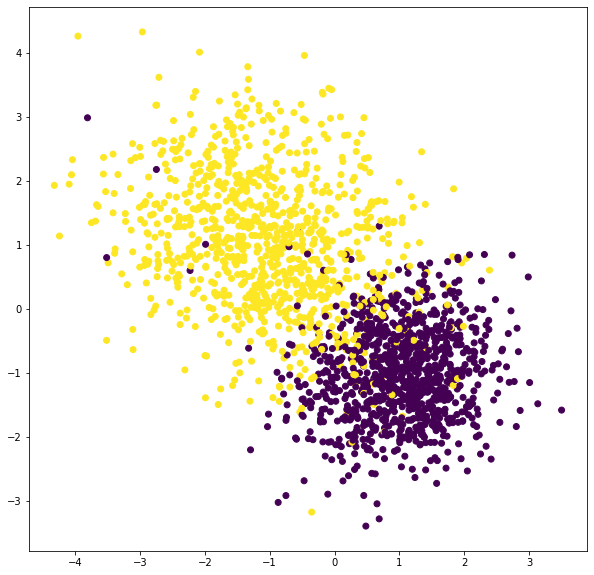

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

### Regularyzacja Tichonowa
###  $$ (X^T*X + λI)^{-1}*X^T*Y$$

In [5]:
def ridge_regression(X,y,alpha):            
    I = np.identity(X.shape[1])                        
    ridge = np.linalg.pinv(X.T @ X + alpha * I) @ X.T @ y
    return ridge

def my_prediction(theta, XY):
    Y_pred = XY @ theta
    mean = np.mean(Y_pred)
    
    ans = []
    for x in Y_pred:
        if x >= mean:
            ans.append(1.0)
        else:
            ans.append(0)
    return np.asarray(ans)

start_time_my = time.time()

for i in range(times):
    ridge = ridge_regression(X_train, Y_train, alpha = 1e-100)
end_time_my = (time.time() - start_time_my)/times

my_pred = my_prediction(ridge, X_test)
acc_my = metrics.accuracy_score(my_pred, Y_test)

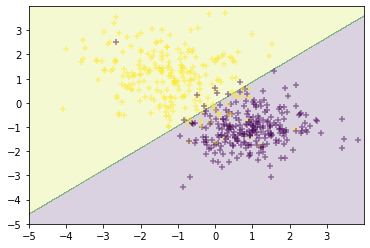

In [6]:
mesh = np.meshgrid(np.arange(-5, 4, 0.01), np.arange(-5, 4, 0.01))[0]
my_pred_print = my_prediction(ridge, np.c_[mesh.ravel(), mesh.T.ravel()]).reshape(mesh.shape)
plt.contourf(mesh, mesh.T, my_pred_print, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test+1, marker="+", alpha=0.5)

### RidgeClassifier

In [7]:
start_time_ri = time.time()
for i in range(times):
    model_ridge = RidgeClassifier(alpha=2e-16).fit(X_train, Y_train)
end_time_ri = (time.time() - start_time_ri)/times


sk_pred = model_ridge.predict(X_test)
acc_sk = metrics.accuracy_score(sk_pred, Y_test)

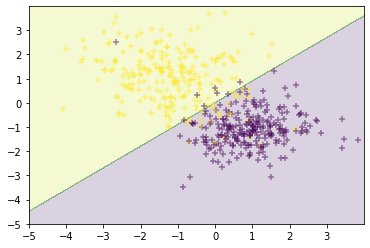

In [8]:
mesh = np.meshgrid(np.arange(-5, 4, 0.01), np.arange(-5, 4, 0.01))[0]
predict = model_ridge.predict(np.c_[mesh.ravel(), mesh.T.ravel()]).reshape(mesh.shape)
plt.contourf(mesh, mesh.T, predict, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test+1, marker="+", alpha=0.5)

### Wyniki

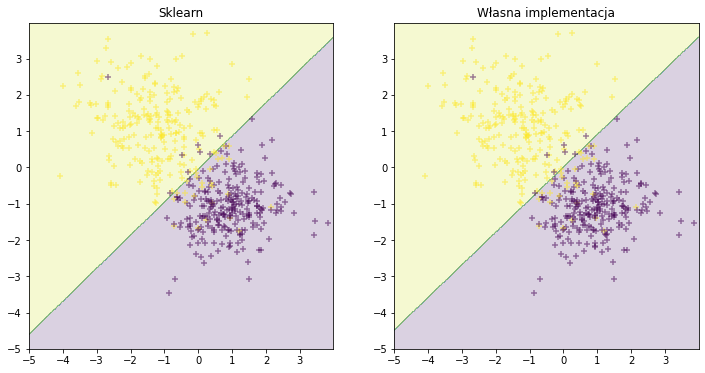

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))

ax1.set_title("Sklearn")
ax1.contourf(mesh, mesh.T, my_pred_print, alpha=0.2)
ax1.scatter(X_test[:, 0], X_test[:, 1], c=Y_test+1, marker="+", alpha=0.5)

ax2.set_title("Własna implementacja")
ax2.contourf(mesh, mesh.T, predict, alpha=0.2)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=Y_test+1, marker="+", alpha=0.5)

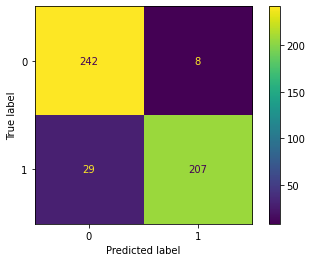

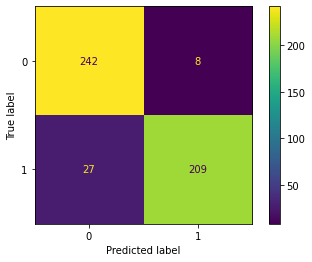

In [10]:
my_cm = metrics.confusion_matrix(Y_test, my_pred)
my_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=my_cm)
my_disp.plot()

sk_cm = metrics.confusion_matrix(Y_test, sk_pred)
sk_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=sk_cm)
sk_disp.plot()

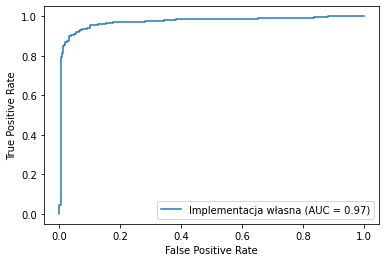

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test @ ridge)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Implementacja własna')
display.plot()

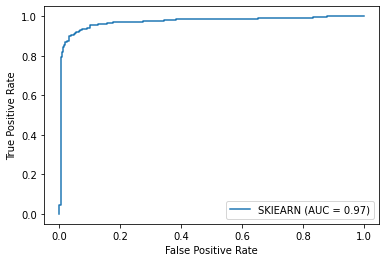

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model_ridge.decision_function(X_test))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SKlEARN')
display.plot()

In [13]:
print(f'Czas pracy dla mojej implementacji: {end_time_my}')
print(f'Czas pracy dla RidgeClassifier: {end_time_ri}')
print(f'Celność mojej implementacji: {acc_my}')
print(f'Celność mojej implementacji: {acc_sk}')
print("Specifoczność RidgeClassifier: ",sk_cm[1][1]/(sk_cm[0][0]+sk_cm[1][1]))
print("Specyficzność własnej implementacji: ",my_cm[1][1]/(my_cm[0][0]+my_cm[1][1]))

Czas pracy dla mojej implementacji: 0.00011493921279907226
Czas pracy dla RidgeClassifier: 0.0015474820137023925
Celność mojej implementacji: 0.9238683127572016
Celność mojej implementacji: 0.9279835390946503
Specifoczność RidgeClassifier:  0.4634146341463415
Specyficzność własnej implementacji:  0.4610244988864143


### Zbiór cleveland

In [ ]:
column_name = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv("HeartCleveland.csv", names = column_name) 
df

In [ ]:
for column in column_name:
    print(df[df[column] == '?'].index)
    

In [ ]:
for column in column_name:
    df = df.drop(df.index[df[column] == '?'])
    
df

In [ ]:
df.loc[df['num'] > 0,'num'] = 1
df.loc[df['num'] == 0, 'num'] = -1

In [ ]:

column_discreet = ['trestbps', 'chol', 'thalach','oldpeak']
column_Still = ['age']
column_categorical  = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'num']
df = df.apply(pd.to_numeric) 


discreet_healthy_s = pd.Series(dtype='float64')
for column in column_discreet:
    discreet_healthy = pd.Series({
        f'mean {column}': df.query("num == -1")[column].mean(),
        f'std {column}': df.query("num == -1")[column].std(),
        f'max {column}': df.query("num == -1")[column].max(),
        f'min {column}': df.query("num == -1")[column].min()})
    discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)

Still_healthy_s = pd.Series(dtype='float64')
for column in column_Still:
    mean_col = df.query("num == -1")[column].mean()
    mean_col = round(mean_col)
    
    Still_healthy = pd.Series({
        f'mean {column}': mean_col,
        f'std {column}': df.query("num == -1")[column].std(),
        f'max {column}': df.query("num == -1")[column].max(),
        f'min {column}': df.query("num == -1")[column].min()})
    Still_healthy_s = Still_healthy_s.append(Still_healthy)

categorical_healthy_s = pd.Series(dtype='float64')
for column in column_categorical:
    dom_col = df.query("num == -1")[column].mode()
    dom_col = dom_col[0]
    categorical_healthy = pd.Series({
        f'dominant {column}': dom_col})
    categorical_healthy_s = categorical_healthy_s.append(categorical_healthy)
    
healthy = pd.concat([discreet_healthy_s,Still_healthy_s,categorical_healthy_s])
healthy

In [ ]:

column_discreet = ['trestbps', 'chol', 'thalach','oldpeak']
column_Still = ['age']
column_categorical  = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'num']
df = df.apply(pd.to_numeric) 

discreet_healthy_s = pd.Series(dtype='float64')
for column in column_discreet:
    discreet_healthy = pd.Series({
        f'mean {column}': df.query("num == 1")[column].mean(),
        f'std {column}': df.query("num == 1")[column].std(),
        f'max {column}': df.query("num == 1")[column].max(),
        f'min {column}': df.query("num == 1")[column].min()})
    discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)

Still_healthy_s = pd.Series(dtype='float64')
for column in column_Still:
    mean_col = df.query("num == -1")[column].mean()
    mean_col = round(mean_col)
    
    Still_healthy = pd.Series({
        f'mean {column}': mean_col,
        f'std {column}': df.query("num == 1")[column].std(),
        f'max {column}': df.query("num == 1")[column].max(),
        f'min {column}': df.query("num == 1")[column].min()})
    Still_healthy_s = Still_healthy_s.append(Still_healthy)

categorical_healthy_s = pd.Series(dtype='float64')
for column in column_categorical:
    dom_col = df.query("num == 1")[column].mode()
    dom_col = dom_col[0]
    categorical_healthy = pd.Series({
        f'dominant {column}': dom_col})
    categorical_healthy_s = categorical_healthy_s.append(categorical_healthy)
    
ill = pd.concat([discreet_healthy_s,Still_healthy_s,categorical_healthy_s])


In [ ]:
data = pd.DataFrame({'ill':ill,'healthy':healthy})
data

In [ ]:
cla = 'sex'
_range = 4
x,y=[],[]
healthy = df.query('num == -1')[cla]
ill = df.query('num == 1')[cla]

plt.hist([healthy, ill], _range, stacked=True,color=['g','r'],alpha=0.5, label=['healthy', 'ill'])
plt.xlabel('Wartość cechy')
plt.xlabel('Liczba przypadków')
plt.legend()

In [ ]:
df.corr()

In [ ]:
import seaborn as sn
plt.figure(figsize = (16,10))
sn.heatmap(df.corr(), annot=True)
plt.show()

### Wnioski
Na chorowalność największy wpływ maja thal,ca,oldpeakexang,thalach